In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv("dataset/Country-data.csv")

In [3]:
X = dataset.drop(columns = ['country'])
X.sample(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
89,16.6,65.60,3.88,42.1,29600,14.200,76.1,2.41,12100
109,47.0,9.58,5.25,36.4,1990,15.100,68.3,2.61,592
149,62.6,2.20,9.12,27.8,1850,26.500,71.1,6.23,3600
119,20.3,27.80,5.08,23.8,9960,5.710,77.9,2.54,5020
81,62.7,13.30,11.30,79.9,1730,1.520,60.7,3.84,1490
159,7.3,12.40,17.90,15.8,49400,1.220,78.7,1.93,48400
8,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
138,4.1,49.40,6.93,46.2,30400,3.160,80.1,1.23,22100
142,76.7,19.70,6.32,17.2,3370,19.600,66.3,4.88,1480
114,3.2,39.70,9.48,28.5,62300,5.950,81.0,1.95,87800


## EDA

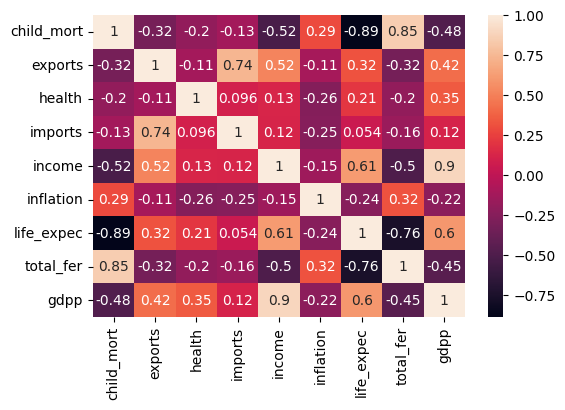

In [4]:
import seaborn as sns
plt.figure(dpi=100)
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

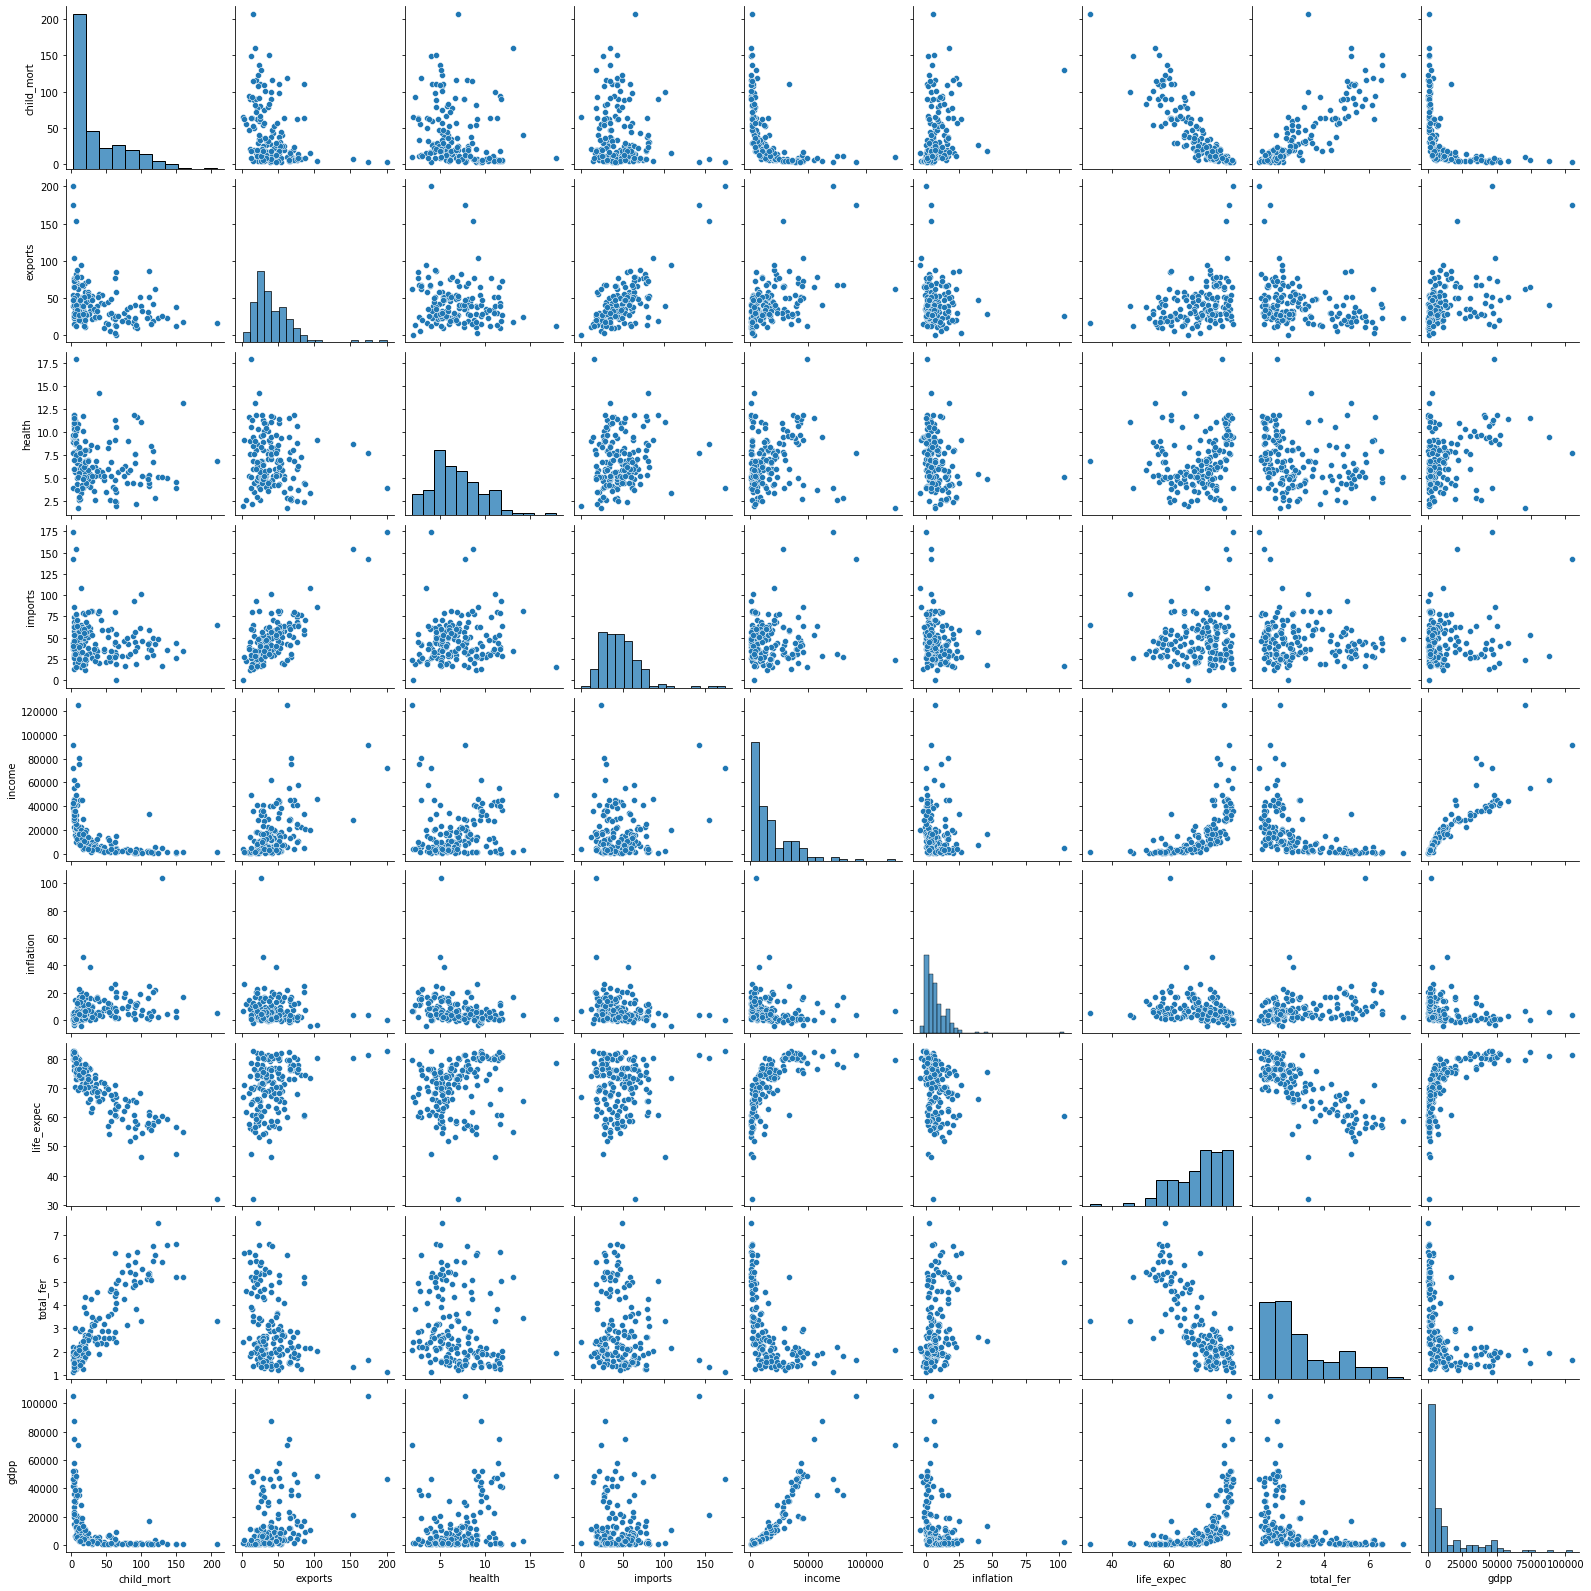

In [5]:
sns.pairplot(data=dataset)

## Datapreprocessing

In [6]:
# removing 'imports' feature
X = X.drop(columns = ['imports'])

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

In [8]:
X

,child_mort,exports,health,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## KMeans Clustering

### Elbow Method

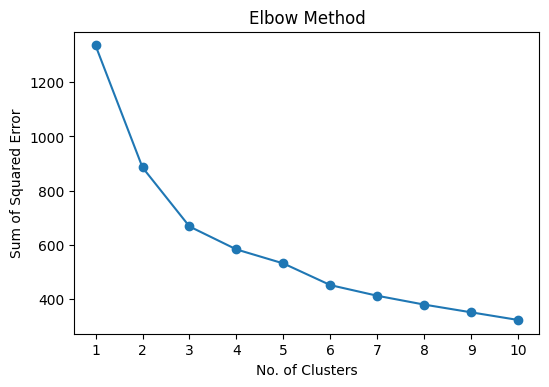

In [9]:
from sklearn.cluster import KMeans
plt.figure(dpi = 100)
k_list = range(1,11)
ssd = []
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(X)
    ssd.append(km.inertia_)

plt.plot(k_list, ssd, marker = 'o')
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Sum of Squared Error")
plt.xticks(k_list)
plt.show()

### Modeling using k = 4

In [10]:
# n_clusters = 4
km_model = KMeans(n_clusters=4)
clusters = km_model.fit_predict(X)

In [11]:
clusters

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 3, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 2, 3, 1, 1, 2, 1, 2, 2, 0, 0, 3, 2, 0, 2, 2, 0,
       0, 2, 2, 3, 2, 0, 0, 2, 2, 0, 3, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 3, 1, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 3, 1, 1, 2, 2, 2, 2, 2, 0, 0])

### Silhouette Analysis

In [12]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, clusters)
print(sil_score)

0.3160678012395479


### Visualizing
I used 'life_expec', 'health', 'child_mort' features to visualize the dataset together with their related clusters.

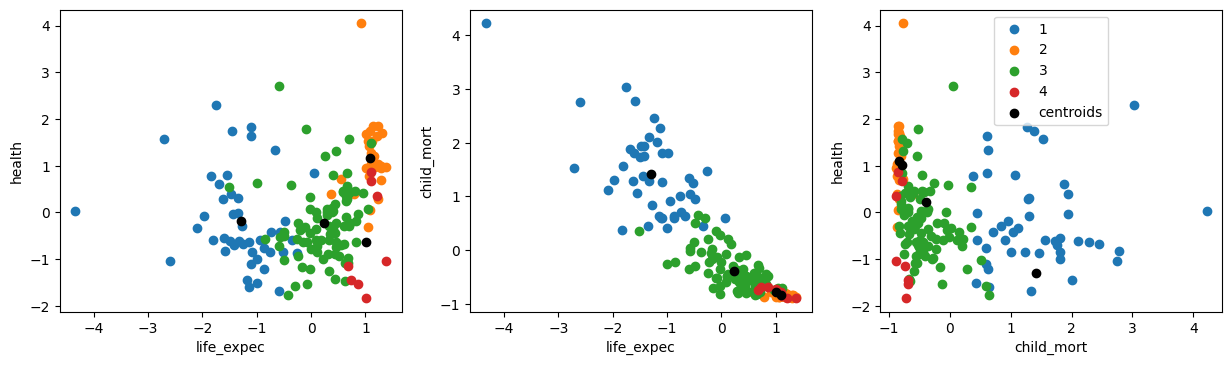

In [44]:
# life_expec, health, child_mort
axs = plt.figure(figsize=(15,4), dpi=100).subplots(1,3)
for c in range(4):
    axs[0].scatter(X['life_expec'].loc[clusters == c], X['health'].loc[clusters == c], label="{0}".format(c+1))
    axs[1].scatter(X['life_expec'].loc[clusters == c], X['child_mort'].loc[clusters == c], label="{0}".format(c+1))
    axs[2].scatter(X['child_mort'].loc[clusters == c], X['health'].loc[clusters == c], label="{0}".format(c+1))

axs[0].scatter(km_model.cluster_centers_[:,5], km_model.cluster_centers_[:,2], c='k', label='centroids')
axs[1].scatter(km_model.cluster_centers_[:,5], km_model.cluster_centers_[:,0], c='k', label='centroids')
axs[2].scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,5], c='k', label='centroids')

axs[0].set(xlabel="life_expec", ylabel="health")
axs[1].set(xlabel="life_expec", ylabel="child_mort")
axs[2].set(xlabel="child_mort", ylabel="health")    
plt.legend()
plt.show()    

## PCA

In [14]:
from sklearn.preprocessing import StandardScaler
dataset_pca = dataset.drop(columns=['country'])
sc = StandardScaler()
dataset_pca = pd.DataFrame(sc.fit_transform(dataset_pca), columns = dataset_pca.columns)
dataset_pca.sample(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
58,-0.847345,0.043580,1.746991,-0.405610,1.209937,-0.666461,1.076446,-1.032237,1.577993
160,-0.688173,-0.541862,0.560254,-0.890343,-0.002325,-0.272496,0.659145,-0.575074,-0.058234
117,-0.461850,1.057125,0.468966,1.297170,-0.090773,-0.492630,0.817042,-0.217294,-0.267277
145,-0.839884,0.837584,1.710476,0.265559,1.995566,-0.708305,1.313292,-0.946105,3.372918
46,-0.327548,-0.483317,0.454360,-0.600332,-0.405545,-0.029588,0.692980,-0.190792,-0.454431
56,1.045313,-0.633337,-0.411045,-0.173601,-0.805644,-0.330376,-0.570201,1.830001,-0.678687
40,1.808842,0.347277,-0.553454,-0.148743,-0.752055,-0.226950,-1.607814,1.538477,-0.642679
66,4.221297,-0.944352,0.034438,0.737863,-0.813969,-0.221257,-4.337186,0.253120,-0.673215
125,-0.703095,-0.435750,-0.633787,-1.068493,0.309845,0.608992,-0.152900,-0.912977,-0.123902
79,-0.417083,0.113101,-0.922255,-0.703908,0.153760,1.111885,-0.243127,-0.230545,-0.213101


### Percentage of Variance Explained

<BarContainer object of 9 artists>

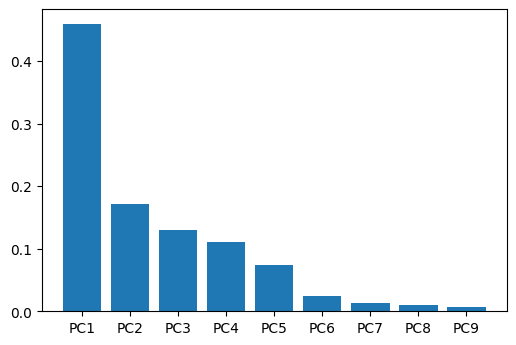

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=dataset_pca.shape[1], svd_solver='full')
pca.fit_transform(dataset_pca)
plt.figure(dpi=100)
plt.bar(["PC{0}".format(i+1) for i in range(9)], pca.explained_variance_ratio_)

In [28]:
# The best number of components is 5.
max_n_components = 5
pca_max_explain = PCA(n_components=max_n_components, svd_solver='full')
dataset_transformed = pd.DataFrame(pca_max_explain.fit_transform(dataset_pca), columns=['F{0}'.format(i+1) for i in range(max_n_components)])
dataset_transformed

,F1,F2,F3,F4,F5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581
164,0.498524,1.390744,-0.238526,-1.074098,1.176081
165,-1.887451,-0.109453,1.109752,0.056257,0.618365


### KMeans clustering after PCA

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
clusters_pca = kmeans.fit_predict(dataset_transformed)

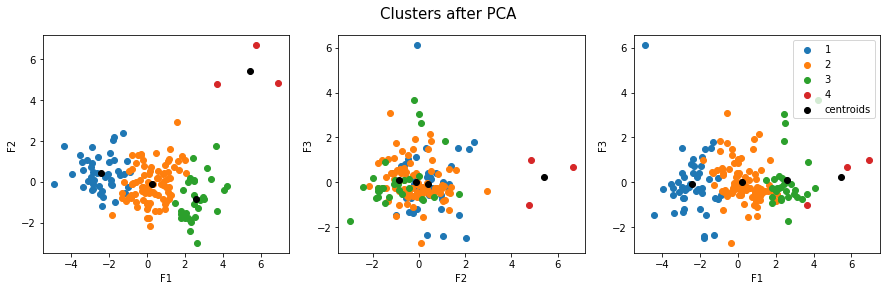

In [41]:
fig = plt.figure(figsize=(15,4))
axs = fig.subplots(1,3)
for c in range(4):
    axs[0].scatter(dataset_transformed['F1'].loc[clusters_pca == c], dataset_transformed['F2'].loc[clusters_pca == c], label="{0}".format(c+1))
    axs[1].scatter(dataset_transformed['F2'].loc[clusters_pca == c], dataset_transformed['F3'].loc[clusters_pca == c], label="{0}".format(c+1))
    axs[2].scatter(dataset_transformed['F1'].loc[clusters_pca == c], dataset_transformed['F3'].loc[clusters_pca == c], label="{0}".format(c+1))
    
axs[0].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='k', label="centroids")
axs[1].scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='k', label="centroids")
axs[2].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], c='k', label="centroids")

axs[0].set(xlabel="F1", ylabel="F2")
axs[1].set(xlabel="F2", ylabel="F3")
axs[2].set(xlabel="F1", ylabel="F3")
fig.suptitle("Clusters after PCA", fontsize=15)    
plt.legend()
plt.show()    

In [42]:
sil_score = silhouette_score(dataset_transformed, clusters_pca)
print(sil_score)

0.32718347402877207
